# Image Processing with Deep Learning
<a href="https://colab.research.google.com/github/ntu-dl-bootcamp/deep-learning-2025/blob/main/SESSION3/session3_part1_instructor.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

Welcome to the third session of deep learning bootcamp.  Today we are going to learn how computers "see" images and how we can use deep learning for image processing.  Feel free to jot down any notes you have from today's session in this notebook and please feel free to modify and experiment with the code during today's exercises.

## Introduction: How Do Computers See Images?

Before we dive into deep learning, let's understand a fundamental concept: **computers don't see images the way we do**. To a computer, every image is just a grid of numbers!

Let's see this for ourselves using handwritten digits from the MNIST dataset.

In [2]:
# First, let's import the tools we need
import torch
import torchvision
from matplotlib import pyplot as plt
import numpy as np

# Download the MNIST dataset (handwritten digits 0-9)
mnist_data = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

print("Dataset downloaded successfully!")
print(f"We have {len(mnist_data)} images of handwritten digits to work with.")

100%|██████████| 9.91M/9.91M [00:25<00:00, 396kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 73.2kB/s]
100%|██████████| 1.65M/1.65M [00:10<00:00, 158kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.15MB/s]

Dataset downloaded successfully!
We have 60000 images of handwritten digits to work with.


### Seeing an Image as Humans Do

Let's first look at an image the way we normally would:

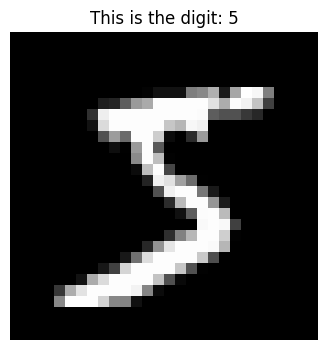

You can see this is a handwritten '5'


In [9]:
# Get one image from the dataset
image, label = mnist_data[0]  # The first image

# Display it
plt.figure(figsize=(4, 4))
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"This is the digit: {label}")
plt.axis('off')
plt.show()

print(f"You can see this is a handwritten '{label}'")

### Seeing an Image as Computers Do: Just Numbers!

Now let's see what the computer actually "sees". Each pixel (tiny dot) in the image has a brightness value from 0 (black) to 255 (white).

In [10]:
# Convert the image to numbers we can look at
image_as_numbers = (image.squeeze().numpy() * 255).astype(int)

print("Here's what the computer sees - a grid of numbers!")
print(f"The image is {image_as_numbers.shape[0]} pixels tall and {image_as_numbers.shape[1]} pixels wide.")
print("\nHere's a small portion of the numbers (top-left corner):")
print(image_as_numbers[0:10, 0:10])  # Show just a 10x10 section
print("\n0 = black pixel, 255 = white pixel, values in between = shades of gray")

Here's what the computer sees - a grid of numbers!
The image is 28 pixels tall and 28 pixels wide.

Here's a small portion of the numbers (top-left corner):
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36]
 [  0   0   0   0   0   0   0  49 238 253]
 [  0   0   0   0   0   0   0  18 219 253]
 [  0   0   0   0   0   0   0   0  80 156]]

0 = black pixel, 255 = white pixel, values in between = shades of gray


### Visualizing Both Views Side by Side

Let's compare the image view with the number view for a small section:

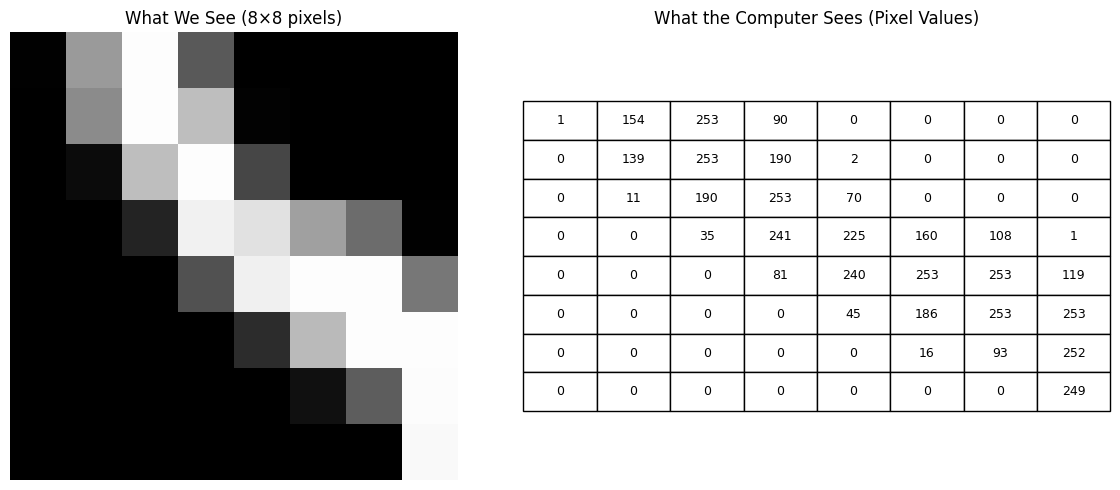

See how each number corresponds to how bright that pixel is!
This is the KEY IDEA: Images are just grids of numbers to a computer.


In [11]:
# Take a small section of the image to see both views clearly
small_section = image_as_numbers[10:18, 10:18]  # An 8x8 pixel section

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left: Visual representation
ax1.imshow(small_section, cmap='gray', vmin=0, vmax=255)
ax1.set_title('What We See (8×8 pixels)')
ax1.axis('off')

# Right: The actual numbers
ax2.axis('off')
ax2.set_title('What the Computer Sees (Pixel Values)')
table_data = [[str(val) for val in row] for row in small_section]
table = ax2.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

plt.tight_layout()
plt.show()

print("See how each number corresponds to how bright that pixel is!")
print("This is the KEY IDEA: Images are just grids of numbers to a computer.")

### Why This Matters for Deep Learning

Understanding that images are numbers is crucial because:
- Computers can only do math with numbers
- Deep learning works by doing mathematical operations on these numbers
- When we "process" an image, we're really just transforming these numbers in smart ways

Now let's see how we can use this understanding to detect patterns in images!

## Excercise 1: Edge Detection

Now we will perform edge detection on an image using manually designed kernel.  Edges are where the brightness changes suddenly (like going from black to white). We can find them by comparing neighboring pixels.

### Step 1: Get an Image to Work With

Let's pick a digit that has clear edges:

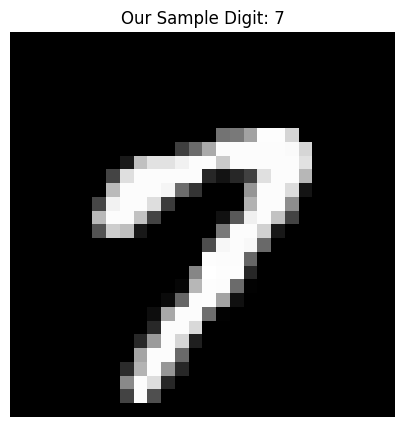

Image ready for edge detection!


In [12]:
# Let's find a nice clear digit to work with
# We'll look for a '7' which has good vertical and horizontal edges
for i in range(len(mnist_data)):
    img, lbl = mnist_data[i]
    if lbl == 7:
        sample_image = img
        sample_label = lbl
        break

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Our Sample Digit: {sample_label}")
plt.axis('off')
plt.show()

# Convert to the format we need for processing
img = sample_image.float()
print("Image ready for edge detection!")

In [ ]:
img = Image.open('Peppers.bmp')                             # Open the image
img = torchvision.transforms.functional.pil_to_tensor(img)  # Convert it to a tensor
img = img.float()                                           # Convert from integer to floating point
plt.imshow(img.squeeze().numpy(), cmap='gray')              # Use matplotlib to display the image
plt.show()

Now we will detect vertical edges in the image...

In [ ]:
vertical_filter = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    bias=None
)

vertical_filter.weight = torch.nn.Parameter(
    torch.Tensor([[[
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]]])
)

vertical_edges = vertical_filter(img.unsqueeze(0))
vertical_edges = vertical_edges.detach().squeeze().numpy()
plt.imshow(vertical_edges, cmap='gray')
plt.show()

Can you detect the horizontal edges?  Make a custom kernel below check the result...

In [ ]:
horizontal_filter = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    bias=None
)

horizontal_filter.weight = torch.nn.Parameter(
    torch.Tensor([[[
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]]])
)

horizontal_edges = horizontal_filter(img.unsqueeze(0))
horizontal_edges = horizontal_edges.detach().squeeze().numpy()
plt.imshow(horizontal_edges, cmap='gray')
plt.show()

Now can you combine the result of the two filters together to display all edges?

In [ ]:
all_edges = horizontal_edges + vertical_edges
plt.imshow(all_edges, cmap='gray')

## Excercise 2: Parameters of A Convolution

### 2a: input and output channels
Define a convolutional filter with 4 input channels and 6 output channels.  What will the output shape be?

In [ ]:
# TODO: replace the line below with the correct initialization for conv.
conv = torch.nn.Conv2d(
    in_channels=4,
    out_channels=6,
    kernel_size=1
)

x = torch.rand([1, 4, 100, 100])
y = conv(x)
print(y.shape)

### 2b: kernel size
Define a convolution kernel with a kernel size of 7x9 and no padding. What will the output shape be?

In [ ]:
# TODO: replace the line below with the correct initialization for conv.
conv = torch.nn.Conv2d(
    in_channels=16,
    out_channels=32,
    kernel_size=(7,9)
)

x = torch.rand([3, 16, 255, 255])
y = conv(x)
print(y.shape)

### 2c: padding
Define a convolution kernel with size 3x3 and 1 pixel of padding.  What will the ouptut shape be?

In [ ]:
# TODO: replace the line below with the correct initialization for conv.
conv = torch.nn.Conv2d(
    in_channels=64,
    out_channels=128,
    kernel_size=3,
    padding=1
)

x = torch.rand([32, 64, 64, 64])
y = conv(x)
print(y.shape)

### 2d: stride

Define a convolutional kernel with size 5x5 and stride 2.  What will the output shape be?

In [ ]:
# TODO: replace the line below with the correct initialization for conv.
conv = torch.nn.Conv2d(
    in_channels=64,
    out_channels=128,
    kernel_size=5,
    padding=2,
    stride=2
)

x = torch.rand([32, 64, 64, 64])
y = conv(x)
print(y.shape)

### 2e: dilation
Define a convolutional kernel with size 7x7 and stride 1, and dilation 2.

In [ ]:
# TODO: replace the line below with the correct initialization for conv.
conv = torch.nn.Conv2d(
    in_channels=64,
    out_channels=32,
    kernel_size=7,
    stride=1,
    dilation=2
)

x = torch.rand([32, 64, 64, 64])
y = conv(x)
print(y.shape)

## Exercise 3: Image classification
Now we will try to classify pictures of numbers by learning filters with a CNN.  We will need to import torchvision to load the dataset.

In [ ]:
import torchvision

# Let's go ahead and seed the random number generator so that we can reproduce our results
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.use_deterministic_algorithms(False)
torch.backends.cudnn.benchmark = False

mnist = torchvision.datasets.MNIST(
    root='sample_data',
    download=True,
    transform=torchvision.transforms.ToTensor()
)
print(f'Total No. Images: {len(mnist)}')

print('Sample of images with ground truth class data:')
fig, ax = plt.subplots(1,5)
for i in range(5):
  ax[i].imshow(mnist[i][0].squeeze())
  ax[i].set_xlabel(mnist[i][1])
  ax[i].get_xaxis().set_ticks([])
  ax[i].get_yaxis().set_ticks([])


### Exercise 3a: Splitting the Dataset
Okay, we've downloaded our dataset and looked at some images.  Now let's split our dataset.  Can you create an 80-10-10 Train/Val/Test split?*italicized text*

In [ ]:
train_set, val_set, test_set = torch.utils.data.random_split(
    mnist,
    [int(0.8 * len(mnist)), int(0.1 * len(mnist)), int(0.1 * len(mnist))]
)
print(f'No. Train Images: {len(train_set)}')
print(f'No. Val Images: {len(val_set)}')
print(f'No. Test Images: {len(test_set)}')

### Exercise 3b: LeNet
A neural network for LeNet is coded below, but it's missing its first convolution in the ```forward()``` method.  Can you complete it?

In [ ]:
class LeNet(torch.nn.Module):

  def __init__(self):
    super().__init__()

    # First Convolution
    self.conv1 = torch.nn.Conv2d(
        in_channels=1,
        out_channels=4,
        kernel_size=5,
        stride=1,
        padding=0
    )
    self.batch_norm1 = torch.nn.BatchNorm2d(4)
    self.activation1 = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d(2)

    # Second Convolution
    self.conv2 = torch.nn.Conv2d(
        in_channels=4,
        out_channels=12,
        kernel_size=5,
        stride=1,
        padding=0
    )
    self.batch_norm2 = torch.nn.BatchNorm2d(12)
    self.activation2 = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d(2)

    # Fully Connected Layers
    self.fully_connected1 = torch.nn.Linear(
        in_features=4 * 4 * 12,
        out_features=10
    )
    self.softmax = torch.nn.LogSoftmax()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # First Convolution
    x = self.conv1(x)
    x = self.batch_norm1(x)
    x = self.activation1(x)
    x = self.pool1(x)

    # Second Convolution
    x = self.conv2(x)
    x = self.batch_norm2(x)
    x = self.activation2(x)
    x = self.pool2(x)

    # Head
    x = x.view(x.size(0), -1)
    x = self.fully_connected1(x)
    y_hat = self.softmax(x)
    return y_hat

### Excercise 3c: Training
Now we need to train our model.  First we will create data loaders, which take data from the dataset and feed it to our model one batch at a time.  We loop over the entire dataset for 10 epochs.  However, there's a problem: the code below isn't calculating our validation loss.  Can you fix it?

In [ ]:
# If we have a GPU, then use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Create an instance of the model and put it on the GPU
model = LeNet()
model = model.to(device)

# Create 2 dataloaders, one for training and one for validation
train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=200,
    shuffle=True,
    drop_last=True
)
val_loader = torch.utils.data.DataLoader(
    dataset=val_set,
    batch_size=200,
    shuffle=True,
    drop_last=True,
)

# We will use negative log likelihood loss
loss_function = torch.nn.NLLLoss()

# Let's use the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training Loop
train_loss = []
val_loss = []
for epoch in range(10):
  train_loss.append(0)
  val_loss.append(0)
  # Training data
  for data in train_loader:
    # Get data from the loader and give it to the network
    x, y = data
    x = x.to(device)
    y = y.to(device)
    y_hat = model(x)

    # Calculate loss
    L = loss_function(y_hat, y)

    # Backpropagation
    optimizer.zero_grad()
    L.backward()
    optimizer.step()

    # Record our result
    train_loss[-1] += L

  # Cross validation
  for data in val_loader:
    x, y = data
    x = x.to(device)
    y = y.to(device)
    with torch.no_grad():
      y_hat = model(x)
      L = loss_function(y_hat, y)
      val_loss[-1] += L

  print(f'Epoch: {epoch} --- Training Loss: {train_loss[-1]:.2f} --- Val Loss: {val_loss[-1]:.2f}')


### Exercise 3d: Test the model
Can you calculate the total number of correct predictions your model makes?

In [ ]:
# Create a test data loader
test_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=200
)

total_predictions = 0
total_correct = 0
for data in train_loader:
  x, y = data
  x = x.to(device)
  y = y.to(device)
  with torch.no_grad():
    y_hat = model(x)
    total_correct += torch.sum(torch.argmax(y_hat, 1) == y)
    total_predictions += y_hat.shape[0]

print(f'Accuracy: {100 * total_correct/total_predictions:.2f}%')

Now let's visualize our predictions...

In [ ]:
# Visualize Predictions
fig, ax = plt.subplots(1,5)
for i in range(5):
  ax[i].imshow(mnist[i][0].squeeze())

  with torch.no_grad():
    y_hat = model(mnist[i][0].unsqueeze(0).to(device))
    ax[i].set_xlabel(f'GT: {mnist[i][1]}, NN: {torch.argmax(y_hat, 1).item()}')

  ax[i].get_xaxis().set_ticks([])
  ax[i].get_yaxis().set_ticks([])

We can also visualize the features we learned.  For more information on explaining what a CNN learned, check out [this blog](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

In [ ]:
fig, ax = plt.subplots(1,4)
for i in range(4):
  filter = model.cpu().conv1.weight[i,0,:,:].squeeze().detach().numpy()
  ax[i].imshow(filter)
  ax[i].get_xaxis().set_ticks([])
  ax[i].get_yaxis().set_ticks([])



### Exercise 3e: Can you do better?
Now see if you can modify the training code or the architecture above to get a better result.

## Exercise 4: Loading a Pretrained Model
Now we will load a pretrained model (Resnet 18) trained on Imagenet.

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.eval()

First, we will grab an image of a dog and visualize it to know what we're working with.  Here we are using urllib to download the file.

In [ ]:
import urllib
urllib.request.urlretrieve("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")

img = Image.open("dog.jpg")
plt.imshow(img)

### Exercise 4a: Inferencing a Pretrained Model
Can you complete the code to classify the image of the dog using Resnet?

In [ ]:
preprocess = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

x = preprocess(img)

y = model(x.unsqueeze(0))
probabilities = torch.nn.functional.softmax(y[0], dim=0)
print(probabilities)

Now let's interpret those results.  Each dimension in the output array corresponds to one class, but Imagenet has 1000 classes.  Luckily there is a list that maps Imagenet dimension number to classes.  Let's use it to find out what we actually predicted...

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

# Load the file as a list in python
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Show the top 5 most likely 5 categories
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Now we're going to grab a dataset of different Pokemon.  This dataset comes in a zip format, so we'll use some new libraries to extract it.

In [ ]:
import zipfile
import io
import requests

response = requests.get('https://osf.io/u4njm/download', stream=True)
archive = zipfile.ZipFile(io.BytesIO(response.content))
archive.extractall()

### Exercise 4b: Fine-tuning Dataset
Before we can perform transfer learning on the Pokemon dataset, we need to split between training, validation, and test.  Can you complete the code below to make that happen?

In [ ]:
preprocess = torchvision.transforms.Compose([
  torchvision.transforms.Resize((224, 224)),
  torchvision.transforms.ToTensor()
])

pokemon = torchvision.datasets.ImageFolder(
  'small_pokemon_dataset',
  transform=preprocess
)

train_set, val_set, test_set = torch.utils.data.random_split(
  pokemon,
  [int(0.8 * len(pokemon)), int(0.1 * len(pokemon)), len(pokemon) - int(0.8 * len(pokemon)) - int(0.1 * len(pokemon))]
)
print(f'No. Train Images: {len(train_set)}')
print(f'No. Val Images: {len(val_set)}')
print(f'No. Test Images: {len(test_set)}')


train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True
)
val_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size=16
)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=16
)

### Excercise 4c: Modifying our pretrained model
Resent comes with 1000 output neurons, but we only have 9 classes.  Can you replace the last layer of the model to only have 9 outputs?

In [ ]:
no_features = model.fc.in_features
model.fc = torch.nn.Linear(no_features, 9)
model = model.to(device)

### Excercise 4d: Training Loop
Can you complete the code below to use cross-entropy loss during training?

In [ ]:
# Set up our optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_function = torch.nn.CrossEntropyLoss()

# Allow model gradients to be updated
model.train()


train_loss = []
val_loss = []
for epoch in range(10):
  train_loss.append(0)
  val_loss.append(0)

  # Train loop
  for batch in train_loader:
    x, y = batch
    x = x.to(device)
    y = y.to(device)

    y_hat = model(x)
    L = loss_function(y_hat, y)
    L.backward()
    optimizer.step()

    train_loss[-1] += L

  # Validation loop
  for data in val_loader:
    x, y = data
    x = x.to(device)
    y = y.to(device)
    with torch.no_grad():
      y_hat = model(x)
      L = loss_function(y_hat, y)
      val_loss[-1] += L

  print(f'Epoch: {epoch} --- Training Loss: {train_loss[-1]:.2f} --- Val Loss: {val_loss[-1]:.2f}')

### Exercise 4e: Prediction
Let's take an image from our dataset.  How did we do at prediction.  Can you complete the code below to find out?

In [ ]:
img = Image.open('small_pokemon_dataset/Blastoise/03bc036b642d4873985399cebfd0bb64.jpg')
x = preprocess(img).to(device)

y = model(x.unsqueeze(0))
probabilities = torch.nn.functional.softmax(y[0], dim=0)
for name, idx in pokemon.class_to_idx.items():
  print(f'{name}: {100 * probabilities[idx]:.2f}%')

## Exercise 5: Segmentation
Now we will use UNET, an early model for image segmentation to look at identifying brain tumors in CT scan images.  First we will load the model from torch hub and download an image to test on.

In [ ]:
# Load Model
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

# Load Test Image
urllib.request.urlretrieve("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
img = Image.open("TCGA_CS_4944.png")
plt.imshow(img)
plt.show()

The code to preprocess the image is provided for you below, can you preprocess the image and inference the model?

In [ ]:
import numpy
mu, sig = numpy.mean(img, axis=(0, 1)), numpy.std(img, axis=(0, 1))
preprocess = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=mu, std=sig),
])
x = preprocess(img)

y = model(x.unsqueeze(0))

plt.imshow(y.squeeze(0,1).detach().numpy())
plt.show()